In [1]:
import pandas as pd
import numpy as np
import os
import sqlalchemy
import sqlite3 as sql
from sklearn.linear_model import LinearRegression
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
import pickle
import joblib

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler


database = "../KAGGLE_PRUBAS_DATA/DATA/diamonds_train.db"
connection = sql.connect(database)

query = '''SELECT tr.index_id, c.clarity, cl.color, ct.cut, dm.depth, dm.'table', dm.x, dm.y, dm.z, tr.price, ci.city, tr.carat
FROM diamonds_properties pr
   INNER JOIN diamonds_clarity c ON pr.clarity_id = c.clarity_id
   INNER JOIN diamonds_color cl on pr.color_id = cl.color_id
   INNER JOIN diamonds_cut ct on pr.cut_id = ct.cut_id
   INNER JOIN diamonds_dimensions dm on pr.index_id = dm.index_id
   INNER JOIN diamonds_transactional tr on pr.index_id = tr.index_id
   INNER JOIN diamonds_city ci on tr.city_id = ci.city_id'''

diamonds = pd.read_sql_query(query,connection)





In [2]:
columnas = ["depth","table","x","y","z","carat","price"]
diamonds_correlacion = diamonds[columnas]
diamonds_correlacion.head()

,depth,table,x,y,z,carat,price
0,62.4,58.0,6.83,6.79,4.25,1.21,4268
1,63.0,57.0,4.35,4.38,2.75,0.32,505
2,65.5,55.0,5.62,5.53,3.65,0.71,2686
3,63.8,56.0,4.68,4.72,3.00,0.41,738
4,60.5,59.0,6.55,6.51,3.95,1.02,4882


CREAMOS DOS NUEVAS COLUMNAS UNA DE VOLUMEN Y OTRA DE DENSIDAD

In [3]:
diamonds_correlacion["volumen"] = diamonds_correlacion["x"] * diamonds_correlacion["y"] * diamonds_correlacion["z"]
diamonds_correlacion["densidad"] =  diamonds_correlacion["volumen"] / diamonds_correlacion["carat"]

/var/folders/y7/0kpvlnh10_q_n3y4x22wmk840000gn/T/ipykernel_6516/1064978677.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  diamonds_correlacion["volumen"] = diamonds_correlacion["x"] * diamonds_correlacion["y"] * diamonds_correlacion["z"]
/var/folders/y7/0kpvlnh10_q_n3y4x22wmk840000gn/T/ipykernel_6516/1064978677.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  diamonds_correlacion["densidad"] =  diamonds_correlacion["volumen"] / diamonds_correlacion["carat"]


In [4]:
diamonds_correlacion.head()

,depth,table,x,y,z,carat,price,volumen,densidad
0,62.4,58.0,6.83,6.79,4.25,1.21,4268,197.096725,162.889855
1,63.0,57.0,4.35,4.38,2.75,0.32,505,52.395750,163.736719
2,65.5,55.0,5.62,5.53,3.65,0.71,2686,113.436890,159.770268
3,63.8,56.0,4.68,4.72,3.00,0.41,738,66.268800,161.631220
4,60.5,59.0,6.55,6.51,3.95,1.02,4882,168.429975,165.127426


PLOTS 

Text(0.5, 1.0, 'depth vs price')

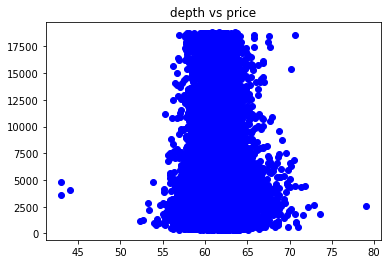

In [5]:
plt.plot(diamonds_correlacion["depth"], diamonds_correlacion["price"], "bo")
plt.title("depth vs price")

Text(0.5, 1.0, 'table vs price')

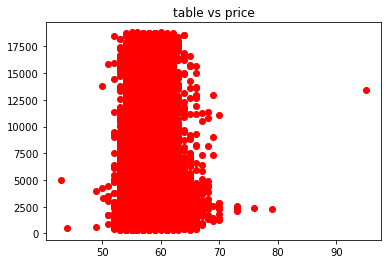

In [11]:
plt.plot(diamonds_correlacion["table"], diamonds_correlacion["price"], "ro")
plt.title("table vs price")

Text(0.5, 1.0, 'carat vs price')

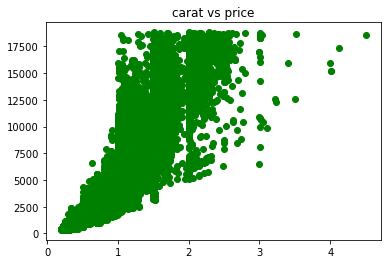

In [10]:
plt.plot(diamonds_correlacion["carat"], diamonds_correlacion["price"], "go")
plt.title("carat vs price")

Text(0.5, 1.0, 'volumen vs price')

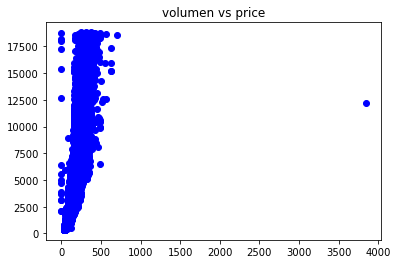

In [13]:
plt.plot(diamonds_correlacion["volumen"], diamonds_correlacion["price"], "bo")
plt.title("volumen vs price")

Text(0.5, 1.0, 'densidad vs price')

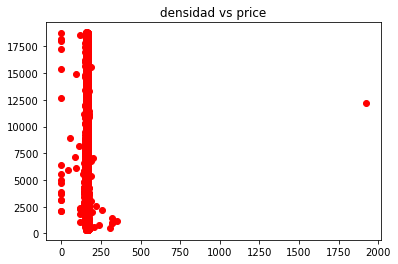

In [15]:
plt.plot(diamonds_correlacion["densidad"], diamonds_correlacion["price"], "ro")
plt.title("densidad vs price")

MATRIZ DE CORRELACION

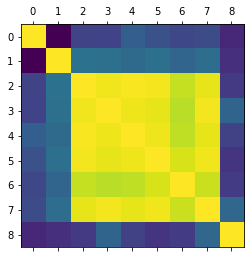

In [16]:
plt.matshow(diamonds_correlacion.corr())

In [17]:
diamonds_correlacion.corr()

,depth,table,x,y,z,carat,price,volumen,densidad
depth,1.000000,-0.293114,-0.026348,-0.030966,0.094655,0.026528,-0.014864,0.006721,-0.143640
table,-0.293114,1.000000,0.196059,0.184673,0.155189,0.183392,0.130111,0.168437,-0.117363
x,-0.026348,0.196059,1.000000,0.973712,0.984876,0.975688,0.885848,0.952303,-0.072328
y,-0.030966,0.184673,0.973712,1.000000,0.964828,0.951667,0.866163,0.977860,0.121528
z,0.094655,0.155189,0.984876,0.964828,1.000000,0.967570,0.874500,0.953983,-0.035600
carat,0.026528,0.183392,0.975688,0.951667,0.967570,1.000000,0.921935,0.971851,-0.092878
price,-0.014864,0.130111,0.885848,0.866163,0.874500,0.921935,1.000000,0.898684,-0.063823
volumen,0.006721,0.168437,0.952303,0.977860,0.953983,0.971851,0.898684,1.000000,0.134892
densidad,-0.143640,-0.117363,-0.072328,0.121528,-0.035600,-0.092878,-0.063823,0.134892,1.000000
